In [9]:
import pandas, seaborn
from glob import glob
import matplotlib as mpl

In [10]:
def get_data(glob_pattern, header=0, columns=None):
    fnames = glob(glob_pattern)

    df = None
    for fname in fnames:
        id_query,endpoint = fname.split(".")[:2]
        id, query = id_query.split("-")
        timings_data = pandas.read_csv(fname, sep=',', header=header)
        if columns is not None:
            timings_data.columns = columns
        
        timings_data = timings_data.melt(var_name='clock', value_name='time (s)')
    
        timings_data['query'] = query.replace("_", " ")
        timings_data['endpoint'] = endpoint

        if df is None:
            df = timings_data
        else:
            df = pandas.concat([df, timings_data])
    return df

In [11]:
data1k = get_data("saved_runs/20241211T102000/1k/??-*.timings.collected.csv")
data2k = get_data("saved_runs/20241211T102000/2k/??-*.timings.collected.csv")
data5k = get_data("saved_runs/20241211T102000/5k/??-*.timings.collected.csv")
data10k = get_data("saved_runs/20241211T102000/10k/??-*.timings.collected.csv")
data20k = get_data("saved_runs/20241211T102000/20k/??-*.timings.collected.csv")
data50k = get_data("saved_runs/20241211T102000/50k/??-*.timings.collected.csv")
data100k = get_data("saved_runs/20241211T102000/100k/??-*.timings.collected.csv")
data200k = get_data("saved_runs/20241211T102000/200k/??-*.timings.collected.csv")

In [12]:
data500k = get_data("saved_runs/20241210T113800/??-*.timings.collected.csv", header=None, columns=['Wall (s)', 'User (s)', 'Sys (s)'])

In [13]:
data500k = data500k[data500k.endpoint=='fuseki']

In [14]:
data1k["ntriples"] = 1000
data2k["ntriples"] = 2000
data5k["ntriples"] = 5000
data10k["ntriples"] = 10000
data20k["ntriples"] = 20000
data50k["ntriples"] = 50000
data100k["ntriples"] = 100000
data200k["ntriples"] = 200000
data500k["ntriples"] = 500000

In [15]:
data = pandas.concat([data1k, data2k, data5k, data10k, data20k, data50k, data100k, data200k])

In [16]:
data

,clock,time (s),query,endpoint,ntriples
0,Wall (s),1.79,image properties,fuseki,1000
1,Wall (s),1.80,image properties,fuseki,1000
2,Wall (s),1.64,image properties,fuseki,1000
3,Wall (s),1.65,image properties,fuseki,1000
4,Wall (s),1.75,image properties,fuseki,1000
...,...,...,...,...,...
25,Sys (s),0.13,group by attribute sort,fuseki,200000
26,Sys (s),0.26,group by attribute sort,fuseki,200000
27,Sys (s),0.18,group by attribute sort,fuseki,200000
28,Sys (s),0.18,group by attribute sort,fuseki,200000


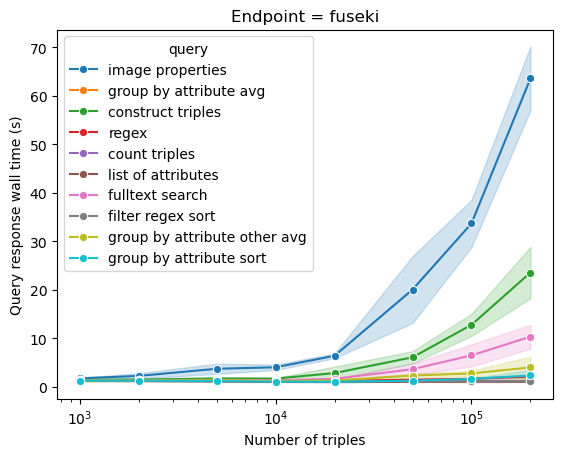

In [17]:
seaborn.lineplot(data=data[data.clock=='Wall (s)'],
                    x='ntriples',
                    y='time (s)',
                    hue='query',
                    marker='o',
                    estimator='mean',
                    errorbar='sd')

mpl.pyplot.xscale('log')
mpl.pyplot.title("Endpoint = fuseki")
mpl.pyplot.xlabel("Number of triples")
mpl.pyplot.ylabel("Query response wall time (s)")

mpl.pyplot.savefig("saved_runs/20241211T102000/fuseki_qrt_vs_ntriples_log.png")

In [58]:
seaborn.FacetGrid?

Init signature:
seaborn.FacetGrid(
    data,
    *,
    row=None,
    col=None,
    hue=None,
    col_wrap=None,
    sharex=True,
    sharey=True,
    height=3,
    aspect=1,
    palette=None,
    row_order=None,
    col_order=None,
    hue_order=None,
    hue_kws=None,
    dropna=False,
    legend_out=True,
    despine=True,
    margin_titles=False,
    xlim=None,
    ylim=None,
    subplot_kws=None,
    gridspec_kws=None,
)
Docstring:      Multi-plot grid for plotting conditional relationships.
Init docstring:
Initialize the matplotlib figure and FacetGrid object.

This class maps a dataset onto multiple axes arrayed in a grid of rows
and columns that correspond to *levels* of variables in the dataset.
The plots it produces are often called "lattice", "trellis", or
"small-multiple" graphics.

It can also represent levels of a third variable with the ``hue``
parameter, which plots different subsets of data in different colors.
This uses color to resolve elements on a third dimension, 

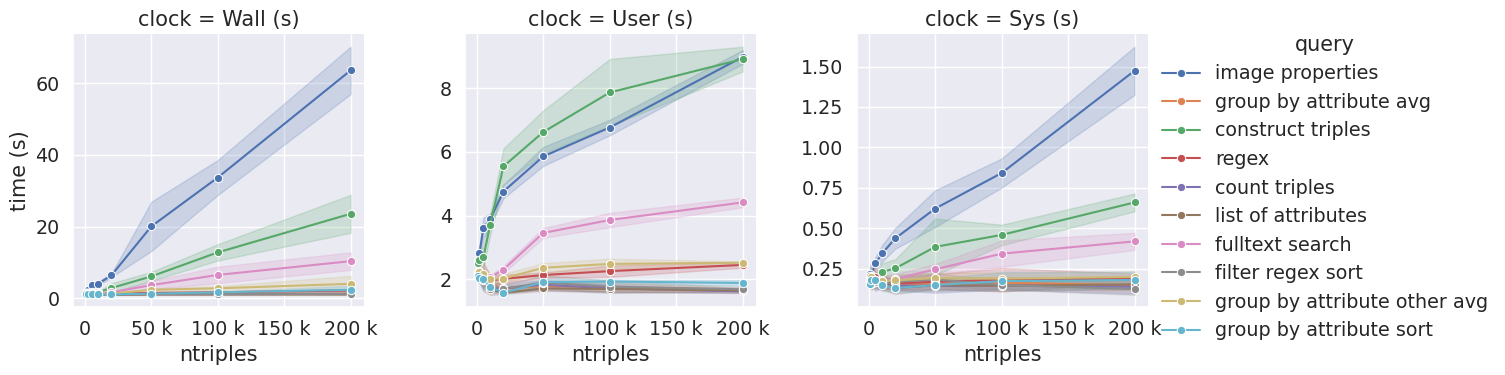

In [41]:
facetgrid = seaborn.FacetGrid(data=data, col='clock', hue='query', sharey=False, height=4 )
facetgrid.map_dataframe( seaborn.lineplot,
              data=data,
                    x='ntriples',
                    y='time (s)',
                    marker='o',
                    estimator='mean',
                    errorbar='sd',
                    )
facetgrid.add_legend()
seaborn.set(font_scale=1.25)

x_formatter = mpl.ticker.EngFormatter()
facetgrid.axes[0][0].xaxis.set_major_formatter(x_formatter)
# facetgrid.savefig("saved_runs/20241211T102000/fuseki_clock_vs_ntriples_linear.png")



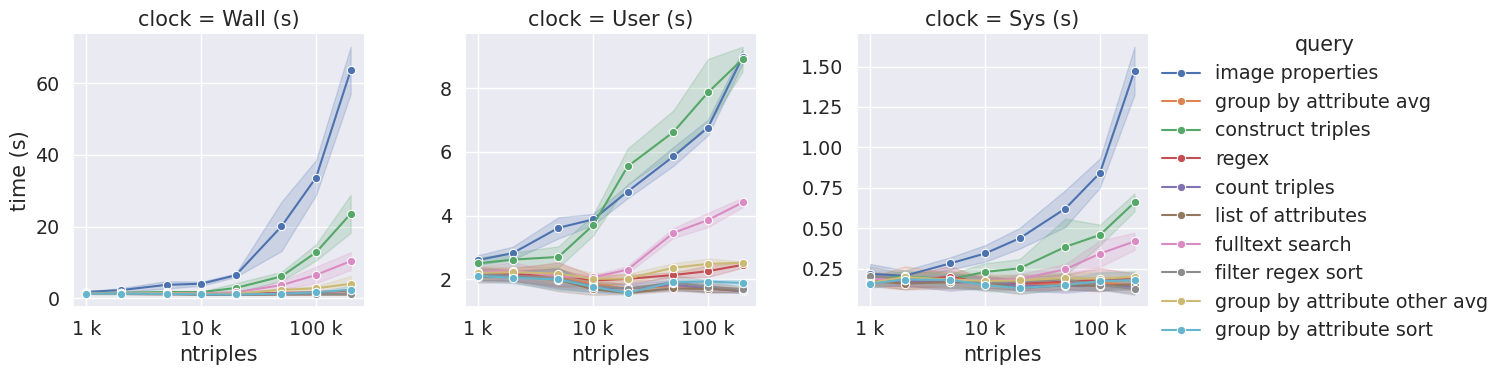

In [42]:
facetgrid = seaborn.FacetGrid(data=data, col='clock', hue='query', sharey=False, height=4 )
facetgrid.map_dataframe( seaborn.lineplot,
              data=data,
                    x='ntriples',
                    y='time (s)',
                    marker='o',
                    estimator='mean',
                    errorbar='sd',
                    )
facetgrid.add_legend()
facetgrid.set(xscale='log')
seaborn.set(font_scale=1.25)
# facetgrid.savefig("saved_runs/20241211T102000/fuseki_clock_vs_ntriples_log.png")

x_formatter = mpl.ticker.EngFormatter()
facetgrid.axes[0][0].xaxis.set_major_formatter(x_formatter)

In [37]:
facetgrid.axes[0][0].xaxis.set_major_formatter(mpl.ticker.LogFormatterSciNotation)

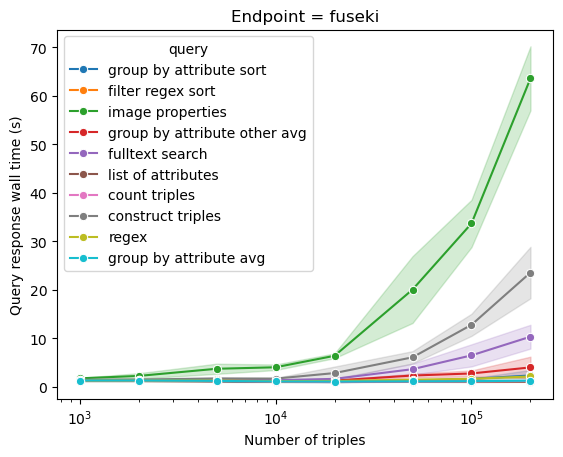

In [ ]:
mpl.pyplot.xscale('log')
mpl.pyplot.title("Endpoint = fuseki")
mpl.pyplot.xlabel("Number of triples")
mpl.pyplot.ylabel("Query response wall time (s)")

mpl.pyplot.savefig("saved_runs/20241211T102000/fuseki_qrt_vs_ntriples_log.png")

Text(0, 0.5, 'Query response user time (s)')

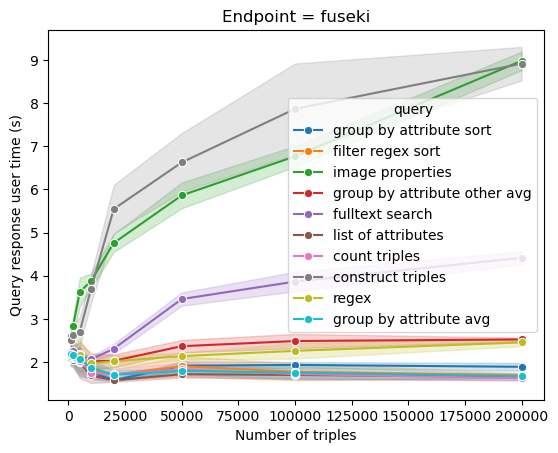

In [55]:
seaborn.lineplot(data=data[data.clock=='User (s)'],
                    x='ntriples',
                    y='time (s)',
                    hue='query',
                    marker='o',
                    estimator='mean',
                    errorbar='sd')

mpl.pyplot.title("Endpoint = fuseki")
mpl.pyplot.xlabel("Number of triples")
mpl.pyplot.ylabel("Query response user time (s)")

# mpl.pyplot.savefig("saved_runs/20241211T102000/fuseki_qrt_vs_ntriples_log.png")